<a href="https://colab.research.google.com/github/MAHIKUMARH/image-classifier/blob/main/imageclassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving dogs1.jpg to dogs1.jpg


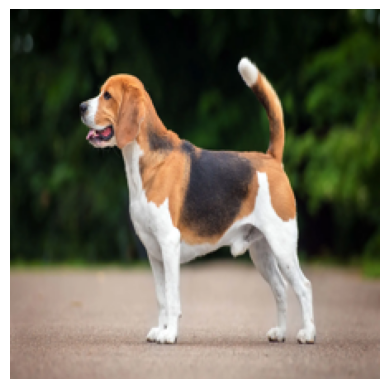

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 877ms/step
Top 3 predictions:
English_foxhound with confidence 46.35%
beagle with confidence 33.12%
Walker_hound with confidence 10.98%


In [ ]:
# Install TensorFlow (usually pre-installed in Colab)
!pip install -q tensorflow

import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image

# Load pretrained MobileNetV2 model with weights trained on ImageNet dataset
model = MobileNetV2(weights='imagenet')

# Upload an image file from your computer
uploaded = files.upload()

for filename in uploaded.keys():
    # Open and resize image to 224x224 (MobileNetV2 input size)
    img = Image.open(filename).convert('RGB')
    img = img.resize((224, 224))

    # Show the uploaded image
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Prepare image data for prediction
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    # Predict the class probabilities
    preds = model.predict(x)

    # Decode top 3 predictions
    predictions = decode_predictions(preds, top=3)[0]

    print("Top 3 predictions:")
    for pred in predictions:
        print(f"{pred[1]} with confidence {pred[2]*100:.2f}%")
